In [1]:
from modules import EncoderNet,DecoderNet,DiscriminatorNet_reconstruction,GeneratorNet
from network import transformNet

import matplotlib.pylab as plt
import resnet
import invresnet
from dataload import load_data ,batchfy 
from torchsummary import summary
import torch
from torch import nn,optim

In [2]:

import torch
%load_ext autoreload
%autoreload 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type(torch.cuda.FloatTensor)

In [3]:
#Encoder=torch.load("Encoder.h")
Encoder=resnet.resnet18()
Encoder=Encoder.to(device)

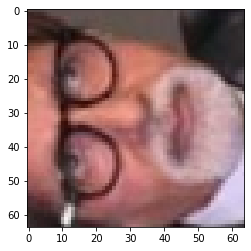

In [4]:
train_load,test_load=batchfy(batch_size=100)
show_img=iter(train_load)

for batch_i, (real_images, gender,glasses) in enumerate(train_load):
    debug=real_images[0]
    plt.imshow((debug.numpy().transpose((1, 2, 0))*0.5)+0.5)
    break
    


In [5]:
sample_batch=real_images
sample_batch=sample_batch.to(device)
sample_output=Encoder(sample_batch.float())

In [6]:
phi=transformNet.phi()
phi.to(device)

invphi=transformNet.phi(inv=True)
invphi.to(device)

phi(
  (fc1): Linear(in_features=99, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=99, bias=True)
)

In [7]:
#opt_phi = optim.Adam(phi.parameters(), lr=0.0001, betas=(0.9, 0.999))
#opt_invphi = optim.Adam(invphi.parameters(), lr=0.001, betas=(0.9, 0.999))
#criterion = nn.BCELoss()

In [8]:
    def triplet(value, positive, negative, margin=0.2) : 
        d = nn.PairwiseDistance(p=2)
        distance = d(value, positive) - d(value, negative) + margin 
        loss = torch.mean(torch.max(distance, torch.zeros_like(distance))) 
        return loss

In [119]:
def TripleletLoss(batch,targetAttribute):

    
    def findtriplet(src,attribute):
        timeout_start = time.time()
        while time.time() < timeout_start + TIMEOUT:
            posindex = random.choice(range(len(attribute)))
            if attribute[src]==attribute[posindex]:
                if src != posindex:
                        break
        while time.time() < timeout_start + TIMEOUT:
            negindex = random.choice(range(len(attribute)))
            if(attribute[src] !=attribute[negindex]):
                break   
        return posindex,negindex
    loss=0
    for i,value in enumerate(batch):
        posindex,negindex=findtriplet(i,targetAttribute)
        
        print(batch.shape)
        print(batch[posindex].shape)
        batch[negindex]
       # loss+=triplet(batch[i],batch[posindex],batch[negindex])
        break
    return None

        

In [120]:
TripleletLoss(glass_vector,glasses)

torch.Size([100, 33])
torch.Size([33])


In [77]:
import random
import time
from torchvision import transforms, utils
TIMEOUT=300




In [84]:

glass_vector,gender_vector,remain=phi(sample_output.to(device))
loss=TripleletLoss(glass_vector,glasses)


tensor([[-0.1281, -0.1709, -0.0223,  ..., -0.0700, -0.0832, -0.1565],
        [-0.0076,  0.0472,  0.1211,  ..., -0.1378,  0.1186, -0.2647],
        [-0.0098, -0.0585, -0.1224,  ..., -0.1870, -0.0801, -0.2799],
        ...,
        [-0.1151, -0.1309,  0.1135,  ..., -0.1077,  0.0063, -0.1256],
        [-0.0339, -0.4553, -0.0393,  ..., -0.2777,  0.1362, -0.3359],
        [ 0.1116,  0.0391,  0.1977,  ..., -0.0868, -0.0491, -0.0880]],
       grad_fn=<SliceBackward>)


In [88]:
loss[0],loss[1],loss[2]
loss[0].shape

torch.Size([33])

In [89]:
d = nn.PairwiseDistance(p=2)

In [90]:
d(loss[0],loss[1])

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [69]:
one=sample_batch[0].detach().cpu()
two=sample_batch[posindex].detach().cpu()
three=sample_batch[negindex].detach().cpu()
show=torch.stack([one,two,three],dim=0)

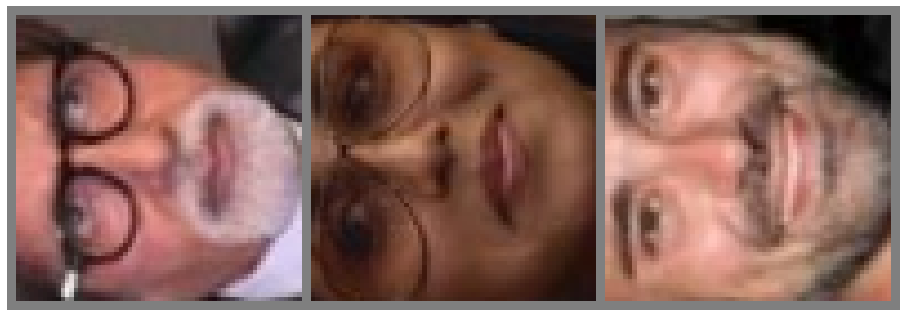

In [70]:

plt.figure(figsize=(16, 16))
grid_border_size = 2
grid = utils.make_grid(show)
    
plt.imshow((grid.numpy().transpose((1, 2, 0))*0.5)+0.5)
plt.axis('off')
plt.ioff()
plt.show()

torch.Size([100, 99])

In [106]:
test=torch.tensor([[1, 2, 3], [4, 5, 6]],dtype=float)

In [107]:
test1=torch.tensor([[4, 5, 6], [1, 2, 3]],dtype=float)

In [108]:
d = nn.PairwiseDistance(p=2)

d(test,test1)

tensor([5.1962, 5.1962], dtype=torch.float64)

In [109]:
def triplet(value, positive, negative, margin=0.2) : 
        d = nn.PairwiseDistance(p=2)
        distance = d(value, positive) - d(value, negative) + margin 
        loss = torch.mean(torch.max(distance, torch.zeros_like(distance))) 
        return loss

In [110]:
triplet(test,test1,test1)

tensor(0.2000, dtype=torch.float64)

In [111]:
test.shape

torch.Size([2, 3])